# 1ère partie : restitution de travail en autonomie

Présentez succintement (~5 minutes) :
* votre jeu de données
* votre architecture de modèle
* la stratégie d'apprentissage actif choisie
* comparaison  performance échantillonage aléatoire vs stratégie d'apprentissage actif

#2ème partie : Génération et classification d'images

## 2.1 : Génération d'image avec un GAN

A partir du jeu de données CIFAR-10, implémentez un GAN simple pour générer des images.

In [1]:
# Importation des librairies
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

2025-09-12 11:37:13.665610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-12 11:37:14.099588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-12 11:37:16.197412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-12 11:37:16.197412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


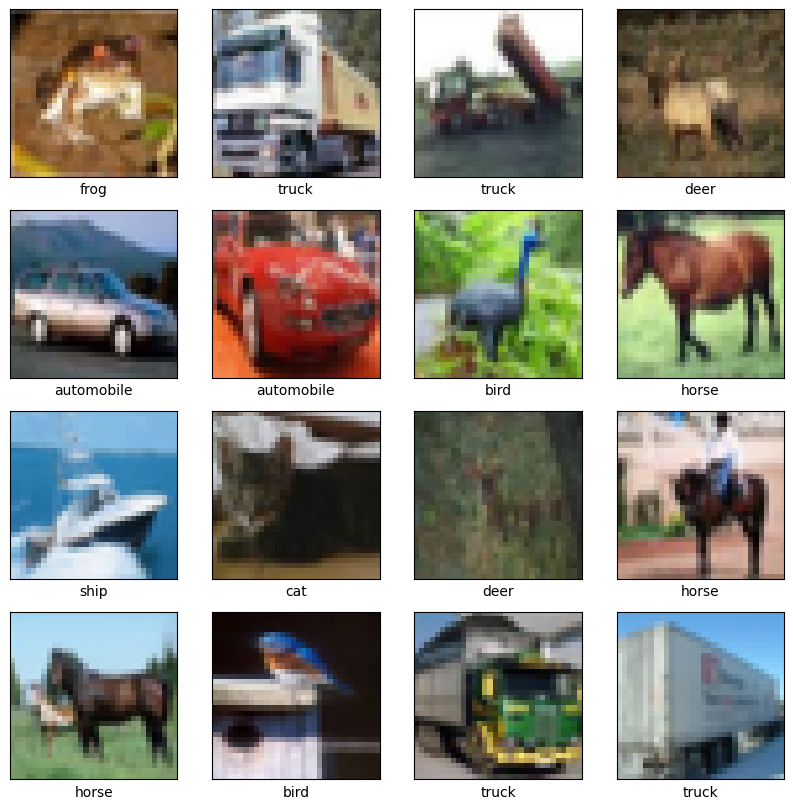

/home/maxime/miniconda3/envs/ia/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/maxime/miniconda3/envs/ia/lib/python3.13/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16384)          │       180,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 3)      │         6,147 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 710,787 (2.71 MB)

 Trainable params: 710,787 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,841 (327.50 KB)

 Trainable params: 83,841 (327.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 32, 32, 3)      │       710,787 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 1)              │        83,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,628 (3.03 MB)

 Trainable params: 710,787 (2.71 MB)

 Non-trainable params: 83,841 (327.50 KB)

In [2]:
# Chargement du jeu de données CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import time
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# TODO : Normalisation des données
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# TODO : Affichage de données
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

# TODO : Architecture du Générateur
from tensorflow.keras.layers import Input, Reshape, Dense, Dropout, Flatten, LeakyReLU, Conv2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
latent_dim = 10

def build_generator():
  model = Sequential()
  model.add(Dense(256 * 8 * 8, activation="relu", input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((8, 8, 256)))

  model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  # output 3 channels so generated images match CIFAR-10 (32x32x3)
  model.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh'))

  model.summary()
  return model

# TODO : Architecture du Discriminateur

def build_discriminator():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(32,32,3), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.summary()
  return model

# TODO : Compilation et combinaison des modèles
def get_optimizer():
  return Adam(0.0002, 0.5)

generator = build_generator()
discriminator = build_discriminator()

generator.compile(loss='binary_crossentropy', optimizer=get_optimizer())
discriminator.compile(loss='binary_crossentropy', optimizer=get_optimizer(), metrics=['accuracy'])

discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

gan.compile(loss='binary_crossentropy', optimizer=get_optimizer())
gan.summary()





In [ ]:
# TODO : entraînez le GAN
def plot_loss(epoch, d_losses, g_losses):
  plt.figure(figsize=(10,5))
  plt.plot(d_losses, label='Discriminator Loss')
  plt.plot(g_losses, label='Generator Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(f'Loss at Epoch {epoch}')
  plt.show()

# default to the generator defined earlier so calls with a single arg still work
def plot_generated_images(epoch, generator=generator, examples=36, dim=(6,6), figsize=(10,10)):
  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0], dim[1], i+1)
    # générer une image (sortie du générateur attendue en tanh -> [-1,1])
    img = generator.predict(np.random.randn(1, latent_dim))[0]
    # si sortie en tanh, remettre dans [0,1] pour affichage
    img = (img + 1.0) / 2.0
    img = np.clip(img, 0.0, 1.0)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
  plt.tight_layout()
  plt.show()

def save_models(epoch):
  generator.save(f'generator_epoch_{epoch}.h5')
  discriminator.save(f'discriminator_epoch_{epoch}.h5')

d_losses = []
g_losses = []

def train(epochs, batch_size=128, save_interval=10):
  batch_count = X_train.shape[0] // batch_size
  for epoch in range(1,epochs + 1):
    print(f'Epoch {epoch}/{epochs}')
    for _ in tqdm(range(batch_count)):
      
      # Train Discriminator
      # -------------------
      # Sélection d'images réelles
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      real_images = X_train[idx]

      # Génération d'images fausses
      noise = np.random.randn(batch_size, latent_dim)
      fake_images = generator.predict(noise)

      # Combinaison des images réelles et fausses
      combined_images = np.concatenate([real_images, fake_images])

      # Création des labels pour les images réelles et fausses
      labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
      labels += 0.05 * np.random.random(labels.shape)  # Label smoothing

      # entraînement du discriminateur
      discriminator.trainable = True
      d_loss = discriminator.train_on_batch(combined_images, labels)

      # Train Generator
      # -------------------
      noise = np.random.randn(batch_size, latent_dim)
      misleading_labels = np.ones((batch_size, 1))  # On veut que le générateur trompe le discriminateur

      discriminator.trainable = False
      g_loss = gan.train_on_batch(noise, misleading_labels)
    
    # Enregistrement des pertes
    d_losses.append(d_loss)
    g_losses.append(g_loss)

    # enregistrement et affichage périodique
    if epoch % save_interval == 0:
      plot_generated_images(epoch)
      save_models(epoch)


# paramètres d'entraînement
epochs = 5
batch_size = 128
save_interval = 1

train(epochs, batch_size, save_interval)

Epoch 1/5


  0%|          | 0/390 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 1/390 [00:00<03:51,  1.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  1%|          | 2/390 [00:01<03:46,  1.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 3/390 [00:01<03:59,  1.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  1%|          | 4/390 [00:02<03:50,  1.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  1%|▏         | 5/390 [00:02<03:49,  1.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  2%|▏         | 6/390 [00:03<03:45,  1.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  2%|▏         | 7/390 [00:04<03:42,  1.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  2%|▏         | 8/390 [00:04<03:41,  1.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|▏         | 9/390 [00:05<03:38,  1.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  3%|▎         | 10/390 [00:05<03:45,  1.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  3%|▎         | 11/390 [00:06<03:41,  1.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  3%|▎         | 12/390 [00:07<03:42,  1.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  3%|▎         | 13/390 [00:07<03:39,  1.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▎         | 14/390 [00:08<03:35,  1.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  4%|▍         | 15/390 [00:08<03:35,  1.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  4%|▍         | 16/390 [00:09<03:51,  1.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  4%|▍         | 17/390 [00:10<03:48,  1.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  5%|▍         | 18/390 [00:10<03:40,  1.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▍         | 19/390 [00:11<03:34,  1.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|▌         | 20/390 [00:11<03:32,  1.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  5%|▌         | 21/390 [00:12<03:31,  1.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  6%|▌         | 22/390 [00:12<03:33,  1.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|▌         | 23/390 [00:13<03:41,  1.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  6%|▌         | 24/390 [00:14<03:59,  1.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  6%|▋         | 25/390 [00:15<04:00,  1.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  7%|▋         | 26/390 [00:15<03:51,  1.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  7%|▋         | 27/390 [00:16<03:46,  1.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  7%|▋         | 28/390 [00:16<03:40,  1.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  7%|▋         | 29/390 [00:17<03:48,  1.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  8%|▊         | 30/390 [00:18<03:52,  1.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 31/390 [00:18<03:53,  1.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 32/390 [00:19<04:18,  1.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  8%|▊         | 33/390 [00:20<04:06,  1.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▊         | 34/390 [00:20<04:06,  1.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  9%|▉         | 35/390 [00:21<03:56,  1.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  9%|▉         | 36/390 [00:22<03:51,  1.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  9%|▉         | 37/390 [00:22<03:44,  1.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 10%|▉         | 38/390 [00:23<03:39,  1.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 10%|█         | 39/390 [00:24<03:40,  1.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|█         | 40/390 [00:24<03:58,  1.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 11%|█         | 41/390 [00:25<03:55,  1.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█         | 42/390 [00:26<04:00,  1.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 11%|█         | 43/390 [00:26<03:55,  1.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 11%|█▏        | 44/390 [00:27<04:01,  1.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 12%|█▏        | 45/390 [00:28<03:55,  1.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 46/390 [00:29<04:00,  1.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 12%|█▏        | 47/390 [00:29<03:57,  1.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 12%|█▏        | 48/390 [00:30<04:02,  1.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 13%|█▎        | 49/390 [00:31<03:59,  1.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 50/390 [00:31<04:01,  1.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 51/390 [00:32<04:06,  1.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 52/390 [00:33<04:41,  1.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▎        | 53/390 [00:34<04:46,  1.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 14%|█▍        | 54/390 [00:35<04:50,  1.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 14%|█▍        | 55/390 [00:36<04:50,  1.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 14%|█▍        | 56/390 [00:37<04:44,  1.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▍        | 57/390 [00:38<04:46,  1.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 15%|█▍        | 58/390 [00:38<04:50,  1.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 15%|█▌        | 59/390 [00:39<04:35,  1.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 60/390 [00:40<04:26,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 16%|█▌        | 61/390 [00:41<04:15,  1.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 16%|█▌        | 62/390 [00:41<04:03,  1.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 16%|█▌        | 63/390 [00:42<03:57,  1.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▋        | 64/390 [00:43<04:08,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 17%|█▋        | 65/390 [00:43<03:55,  1.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 17%|█▋        | 66/390 [00:44<04:02,  1.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 17%|█▋        | 67/390 [00:45<03:56,  1.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 17%|█▋        | 68/390 [00:46<03:59,  1.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 18%|█▊        | 69/390 [00:46<03:48,  1.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 70/390 [00:47<04:00,  1.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 18%|█▊        | 71/390 [00:48<03:57,  1.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 18%|█▊        | 72/390 [00:49<04:03,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 19%|█▊        | 73/390 [00:50<04:02,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 74/390 [00:50<04:00,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step 


 19%|█▉        | 75/390 [00:51<04:28,  1.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 19%|█▉        | 76/390 [00:52<04:20,  1.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|█▉        | 77/390 [00:53<04:22,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 20%|██        | 78/390 [00:54<04:07,  1.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 20%|██        | 79/390 [00:54<04:06,  1.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 21%|██        | 80/390 [00:55<04:10,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 21%|██        | 81/390 [00:56<04:17,  1.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 21%|██        | 82/390 [00:57<04:06,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 21%|██▏       | 83/390 [00:58<04:07,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 22%|██▏       | 84/390 [00:59<04:05,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 22%|██▏       | 85/390 [00:59<03:52,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 86/390 [01:00<03:49,  1.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 22%|██▏       | 87/390 [01:01<03:42,  1.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 23%|██▎       | 88/390 [01:01<03:41,  1.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 23%|██▎       | 89/390 [01:02<03:38,  1.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 23%|██▎       | 90/390 [01:03<03:44,  1.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 23%|██▎       | 91/390 [01:04<03:47,  1.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▎       | 92/390 [01:04<03:43,  1.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 24%|██▍       | 93/390 [01:05<03:45,  1.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 24%|██▍       | 94/390 [01:06<03:45,  1.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 24%|██▍       | 95/390 [01:07<03:56,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 25%|██▍       | 96/390 [01:08<03:51,  1.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 25%|██▍       | 97/390 [01:08<03:54,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 25%|██▌       | 98/390 [01:09<03:45,  1.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▌       | 99/390 [01:10<04:14,  1.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 26%|██▌       | 100/390 [01:11<04:02,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 26%|██▌       | 101/390 [01:12<03:55,  1.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 26%|██▌       | 102/390 [01:13<04:11,  1.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 26%|██▋       | 103/390 [01:14<04:02,  1.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 27%|██▋       | 104/390 [01:15<04:12,  1.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 27%|██▋       | 105/390 [01:15<03:57,  1.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 106/390 [01:16<03:46,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 27%|██▋       | 107/390 [01:17<03:33,  1.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 28%|██▊       | 108/390 [01:18<03:45,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 28%|██▊       | 109/390 [01:18<03:49,  1.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 28%|██▊       | 110/390 [01:19<03:54,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 28%|██▊       | 111/390 [01:20<03:45,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 29%|██▊       | 112/390 [01:21<03:46,  1.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 113/390 [01:22<03:38,  1.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 29%|██▉       | 114/390 [01:22<03:34,  1.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 29%|██▉       | 115/390 [01:23<03:45,  1.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 30%|██▉       | 116/390 [01:24<03:40,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 117/390 [01:25<03:43,  1.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███       | 118/390 [01:26<03:31,  1.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 119/390 [01:26<03:31,  1.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 31%|███       | 120/390 [01:27<03:29,  1.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 31%|███       | 121/390 [01:28<03:38,  1.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 31%|███▏      | 122/390 [01:29<03:28,  1.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 32%|███▏      | 123/390 [01:30<03:41,  1.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 32%|███▏      | 124/390 [01:31<03:47,  1.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 32%|███▏      | 125/390 [01:31<03:41,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 32%|███▏      | 126/390 [01:32<03:36,  1.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 33%|███▎      | 127/390 [01:33<03:47,  1.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 33%|███▎      | 128/390 [01:34<03:34,  1.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 33%|███▎      | 129/390 [01:35<03:27,  1.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 33%|███▎      | 130/390 [01:35<03:27,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 34%|███▎      | 131/390 [01:36<03:25,  1.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 34%|███▍      | 132/390 [01:37<03:50,  1.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 34%|███▍      | 133/390 [01:38<03:38,  1.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 34%|███▍      | 134/390 [01:39<03:27,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 35%|███▍      | 135/390 [01:40<03:33,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 35%|███▍      | 136/390 [01:40<03:18,  1.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 35%|███▌      | 137/390 [01:41<03:32,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 35%|███▌      | 138/390 [01:42<03:24,  1.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 36%|███▌      | 139/390 [01:43<03:17,  1.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 36%|███▌      | 140/390 [01:44<03:32,  1.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 36%|███▌      | 141/390 [01:45<03:29,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|███▋      | 142/390 [01:45<03:24,  1.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 143/390 [01:47<04:17,  1.04s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 37%|███▋      | 144/390 [01:48<04:29,  1.09s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 145/390 [01:49<04:35,  1.12s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 146/390 [01:50<04:14,  1.04s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 38%|███▊      | 147/390 [01:51<04:12,  1.04s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 38%|███▊      | 148/390 [01:52<04:09,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 38%|███▊      | 149/390 [01:53<04:07,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 38%|███▊      | 150/390 [01:54<04:10,  1.04s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 39%|███▊      | 151/390 [01:55<04:06,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 152/390 [01:56<04:09,  1.05s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 39%|███▉      | 153/390 [01:57<04:03,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 39%|███▉      | 154/390 [01:58<03:52,  1.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 40%|███▉      | 155/390 [01:59<03:30,  1.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 40%|████      | 156/390 [02:00<03:46,  1.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 40%|████      | 157/390 [02:01<03:44,  1.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 41%|████      | 158/390 [02:02<03:37,  1.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 41%|████      | 159/390 [02:03<03:25,  1.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 41%|████      | 160/390 [02:03<03:18,  1.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 41%|████▏     | 161/390 [02:05<03:36,  1.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 42%|████▏     | 162/390 [02:05<03:17,  1.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 42%|████▏     | 163/390 [02:06<03:02,  1.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 42%|████▏     | 164/390 [02:07<02:56,  1.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 42%|████▏     | 165/390 [02:08<03:04,  1.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 43%|████▎     | 166/390 [02:09<03:22,  1.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 43%|████▎     | 167/390 [02:09<03:11,  1.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 43%|████▎     | 168/390 [02:10<03:05,  1.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 43%|████▎     | 169/390 [02:11<03:14,  1.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 44%|████▎     | 170/390 [02:12<03:38,  1.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 44%|████▍     | 171/390 [02:13<03:34,  1.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 44%|████▍     | 172/390 [02:14<03:28,  1.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 44%|████▍     | 173/390 [02:15<03:21,  1.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 45%|████▍     | 174/390 [02:16<03:16,  1.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▍     | 175/390 [02:17<03:32,  1.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 45%|████▌     | 176/390 [02:18<03:13,  1.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 177/390 [02:19<02:59,  1.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 46%|████▌     | 178/390 [02:19<02:48,  1.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 46%|████▌     | 179/390 [02:20<02:55,  1.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 46%|████▌     | 180/390 [02:21<03:05,  1.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [ ]:
# TODO : affichez des images générées
plot_generated_images(epochs)

plot_loss(epochs, d_losses, g_losses)

## 2.2 : Classfication d'images avec un CNN

Le jeu de données CIFAR-10 contient des images appartenant à 10 catégories différentes. Nous allons entraîner un CNN sur cette tâche puis le tester sur les images générées par notre générateur.

In [ ]:
# TODO : créez un modèle CNN pour classifier des données de CIFAR-10 (tâche = multi-classes à 10 classes)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Chargement des données CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# TODO : Normalisation des données (de [0, 255] à [0, 1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# TODO : Conversion des labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = models.Sequential()
# Couches convolutionnelles et de pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajout des couches Dense (classique après la partie convolutionnelle)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Affichage de la structure du modèle
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TODO : entraînez le CNN sur les données réelles de CIFAR-10
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_test, y_test), batch_size=64)

# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Tracer les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Courbe d\'apprentissage')
plt.show()

# TODO : faites des prédictions avec votre CNN sur des données générées par votre générateur
# Charger le générateur entraîné
from tensorflow.keras.models import load_model
generator = load_model('generator_epoch_2.h5') # Charger le générateur entraîné

# Générer des images
def generate_images(generator, n_images=10):
    noise = np.random.randn(n_images, latent_dim)
    generated_images = generator.predict(noise)
    return generated_images

# Prédictions sur des images générées
generated_images = generate_images(generator)

# Affichage des images générées
plt.figure(figsize=(10, 10))
for i in range(len(generated_images)):
    plt.subplot(5, 5, i + 1)
    plt.imshow((generated_images[i] + 1) / 2)  # Remettre dans [0, 1]
    plt.axis('off')
plt.show()

# Prédictions avec le CNN
predictions = model.predict((generated_images + 1) / 2)  # Normaliser les images
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes for generated images:", predicted_classes)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


2025-09-12 11:57:15.923790: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3265 - loss: 1.8184

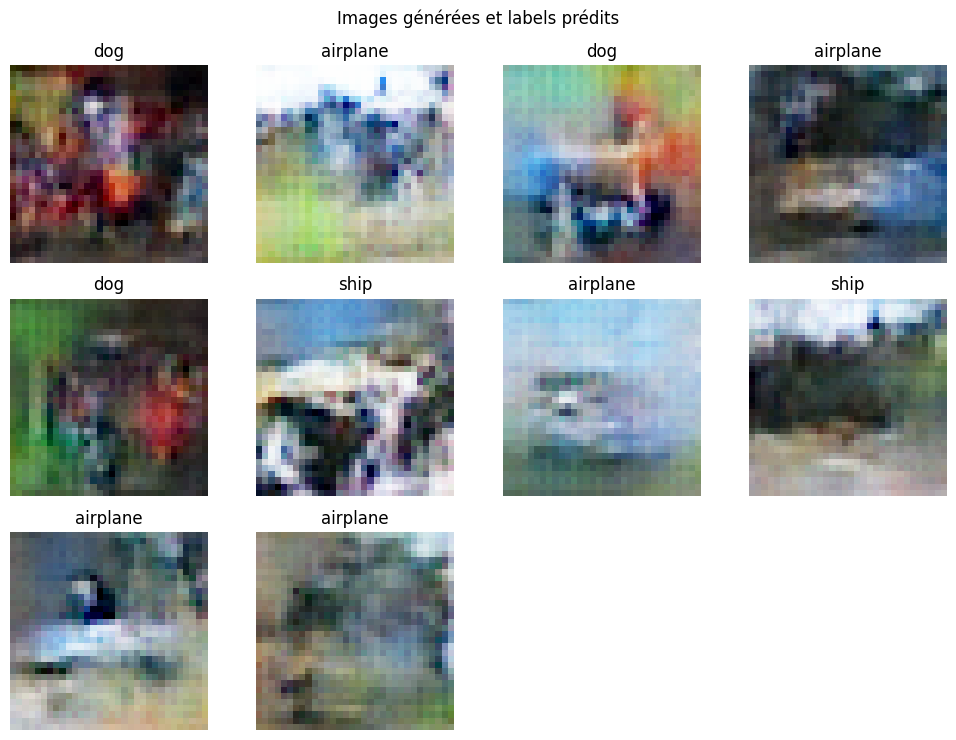

In [ ]:
# Afficher les images générées avec leurs labels prédits
import math
import numpy as np
import matplotlib.pyplot as plt

# Assurer que les variables existent
try:
    imgs = generated_images
    preds = predicted_classes
    names = class_names
except NameError:
    raise NameError("Les variables 'generated_images', 'predicted_classes' ou 'class_names' ne sont pas définies. Exécutez les cellules précédentes.")

n = len(imgs)
max_show = 25
n_show = min(n, max_show)
cols = int(math.ceil(math.sqrt(n_show)))
rows = int(math.ceil(n_show / cols))

plt.figure(figsize=(cols * 2.5, rows * 2.5))
for i in range(n_show):
    plt.subplot(rows, cols, i + 1)
    img = (imgs[i] + 1.0) / 2.0 if imgs[i].max() > 1.0 else imgs[i]  # remettre dans [0,1] si nécessaire
    img = np.clip(img, 0.0, 1.0)
    plt.imshow(img)
    label = names[preds[i]] if (isinstance(names, (list, tuple)) and preds[i] < len(names)) else str(preds[i])
    plt.title(label)
    plt.axis('off')
plt.suptitle('Images générées et labels prédits')
plt.tight_layout()
plt.show()

# 3ème partie : RNN vs LSTM

**Prétraitement**




*   Normaliser les données (sklearn.preprocessing.MinMaxScaler ou StandardScaler).
*   Créer des séquences glissantes de longueur sequence_length pour générer X et y.





**Modèles**

* Construire un modèle RNN et un modèle LSTM avec tensorflow.keras.

* Choisir librement la profondeur, le nombre de neurones, etc.


**Entraînement**

* Entraîner vos modèles sur X_train, valider sur X_val.

* Optionnel : utiliser des callbacks comme EarlyStopping ou ModelCheckpoint


**Évaluation**

* Prédire les rendements sur le jeu de test.

* Reconstruire les prix prédits à partir du dernier prix connu et des rendements prédits.

* Comparer les courbes prix réel vs prix prédit.

* Calculer une métrique d’erreur (ex. MSE, RMSE, MAE).


**Analyse**

* Visualiser et commenter vos résultats.

* Comparer RNN vs LSTM : lequel capture mieux la dynamique ?
